In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random

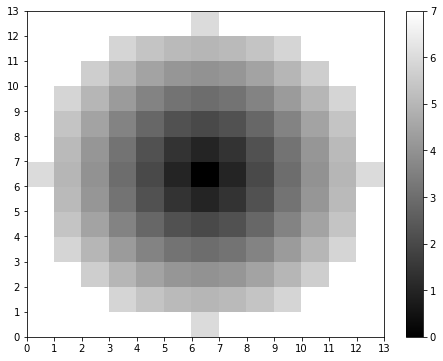

In [657]:
#Show neighborhood
neighborhood = []
for i in range(0,13):
    neighborhood.append([])
    for j in range(-6,7):
        euc = np.sqrt((i-6)**2 + (j)**2)
        if(euc > 6):
            neighborhood[i].append(7)
        else:
            neighborhood[i].append(euc)
fig = plt.figure(figsize = (8,6))
plt.gray()
this = plt.pcolormesh(neighborhood)
plt.xticks(np.arange(0, 14, 1.0))
plt.yticks(np.arange(0, 14, 1.0))
plt.colorbar(this)
#fig.savefig('neighborhood.png')
plt.show()


In [319]:
def S(a1):
    rand = random.uniform(0,1)
    return 1 + (-np.log(rand))**a1
#s is the stochastic disturbance term


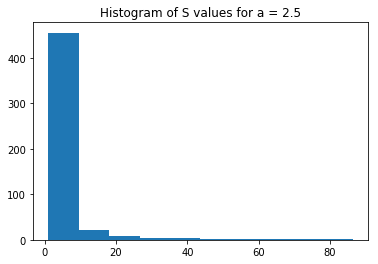

In [690]:
#Visualization of S with different alphas:

for a1 in [2.5]:
    sArray = []
    for i in range(0,500):
        s = S(a1)
        sArray.append(s)
    fig = plt.figure()
    plt.hist(sArray)
    plt.title('Histogram of S values for a = {}'.format(a1))
    #fig.savefig('sHistogram.png')
    plt.show()

In [361]:
#weighting function

#param is the array of parameters (a,b,c,d)
#euc is the euclidean distance to cell
def getM (euc,param = []):
    if(param == ['different']):
        return -2*(np.exp(-2*0.8*(euc - 2.2)) - 2*np.exp(-.8*(euc - 2.2)))
    exp = np.exp(-(euc-param[2])/param[1])
    return param[0]*(exp/(1+exp))+param[3]

m_params =[[26,.1,2.2,-1],[0,1,0,0],[10,2.5,0,0],
           [0,1,0,0],[3.2,.5,2,.2],[-1,.1,2,0],
           ['different'],[-10,0.5,2,0],[2,1,3,0],
           [27,.1,2.2,-2],[-2,.1,2.2,0],[10,2.5,0,0],
           [0,1,0,0],[0,1,0,0],[0,1,0,0],
           [0,1,0,0],[0,1,0,0],[0,1,0,0],
           [26,.1,2.2,-1],[1,.1,2.2,0],[10,2.5,0,0],
           [1,.1,2,0],[2,.1,2.2,0],[-1,.1,2,0],
           [0,1,0,0],[0,1,0,0],[0,1,0,0]]

           


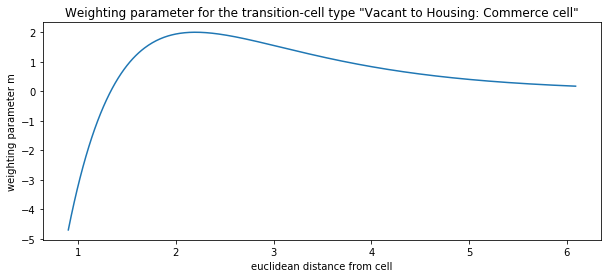

In [607]:
#vizualizing and getting images for the m values:
euc = np.arange(.9,6.1,.01)
fig = plt.figure(figsize = (10,4))
#plt.plot(euc,getM(euc,m_params[0]))
#plt.plot(euc,getM(euc,m_params[2]))
#plt.plot(euc,getM(euc,m_params[7]))
#plt.plot(euc,getM(euc,m_params[4]))
plt.ylabel('weighting parameter m')
plt.xlabel('euclidean distance from cell')
plt.title('Weighting parameter for the transition-cell type \"Vacant to Housing: Commerce cell\"')
plt.plot(euc,getM(euc,m_params[6]))
#plt.legend(['Vacant to Commerce: Commerce cell','Vacant to Commerce: Housing cell'
#          ,'Vacant to Housing: Industry cell','Vacant to Industry: Commerce cell'])
#fig.savefig('interatomic potential.png')
plt.show()
    

In [684]:
#function to get zone
def get_dist(i,j):
    distsqrd = i**2 + j**2
    return np.sqrt(distsqrd)

#function to get cell type
def get_type(x,y,grid = []):
    return grid[x][y][0]



#width of square grid
size = 51
#distance from middle to edge (in number of squares)
radius = (size - 1)/2

def visualize_grid(grid = []):
    visualized_grid = []
    for i in range(0,size):
        visualized_grid.append([])
        for j in range(0,size):
            visualized_grid[i].append(grid[i][j][0])

    plt.figure()
    plt.bone()
    this = plt.pcolormesh(visualized_grid)
    cbar = plt.colorbar(this, ticks=[0, 1, 2, 3])
    cbar.ax.set_yticklabels(['Commerce','Industrial', 'Housing', 'Vacant'])

    plt.show()

def visualize_and_save_grid(time, grid = []):
    visualized_grid = []
    for i in range(0,size):
        visualized_grid.append([])
        for j in range(0,size):
            visualized_grid[i].append(grid[i][j][0])

    fig = plt.figure()
    plt.bone()
    this = plt.pcolormesh(visualized_grid)
    cbar = plt.colorbar(this, ticks=[0, 1, 2, 3])
    cbar.ax.set_yticklabels(['Commerce','Industrial', 'Housing', 'Vacant'])
    fig.savefig('CityPlot' + str(time))
    plt.show()


In [385]:
def getP (x,y,trans_type,grid = []):
    msum = 0
    for j in range(0,13):
        for i in range (0,13):
            dist = get_dist(i-6,j-6)
            #since i and j are relative to the position of the cell, i and 
            #j's actual positions are given by the following:
            real_i = int(x+i-6)
            real_j = int(y+j-6)
            #Check if neighboring cells are in range of the grid
            if(real_i>=0 and real_i <size and real_j>=0 and real_j<size):
                #check if cells are in the neihborhood zone
                if(dist <= 6):
                    #check if cells are not vacant type:
                    cell_type = get_type(real_i,real_j,grid)
                    if(cell_type < 3):
                        msum+= getM(dist, m_params[trans_type*3 + cell_type])
                        
    
    return S(a)*(.25 + msum)

In [250]:
def get_p_array(x,y,grid = []):
    p_array =[]
    celltype = get_type(x,y,testgrid)
    if(celltype == 3):
        p_array.append(getP(x,y,0,grid))
        p_array.append(getP(x,y,1,grid))
        p_array.append(getP(x,y,2,grid))
    if(celltype == 2):
        p_array.append(getP(x,y,6,grid))
        p_array.append(getP(x,y,7,grid))
        p_array.append(0)
    if(celltype == 1):
        p_array.append(getP(x,y,3,grid))
        p_array.append(0)
        p_array.append(0)
    if(celltype == 0):
        p_array.append(0)
        p_array.append(0)
        p_array.append(0)
    return p_array

        

In [237]:
def update_all_pvals(grid = []):
    for i in range (0,size):
        for j in range(0,size):
            grid[i][j][1] = get_p_array(i,j,grid)


In [260]:
#create visualizations for p-values
def visualize_pvals (testgrid = []):
    for t in range(0,3):
        visgrid = []
        for i in range(0,size):
            visgrid.append([])
            for j in range(0,size):
                visgrid[i].append(testgrid[i][j][1][t])
        plt.figure(figsize = (8,6))
        plt.autumn()
        plt.pcolormesh(visgrid)
        plt.show()



In [248]:
def get_pval (x,y,ptype,grid = []):
    return grid[x][y][1][ptype]

In [398]:
#create ranking for cells:
def get_p_rankings (grid = [], ratio = []):
    c_array = []
    i_array = []
    h_array = []
    for i in range(0,size):
        for j in range (0,size):
            c_array.append([i , j , grid[i][j][1][0]])
            i_array.append([i , j , grid[i][j][1][1]])
            h_array.append([i , j , grid[i][j][1][2]])
    c_array.sort(key=lambda x: float(x[2]))
    i_array.sort(key=lambda x: float(x[2]))
    h_array.sort(key=lambda x: float(x[2]))
    length = int(sum(ratio))
    p_rankings = [list(reversed(c_array[-length:])), list(reversed(i_array[-length:])), list(reversed(h_array[-length:]))]
    return p_rankings
    
    

In [246]:
def get_cells_to_update (ratio = [], p_rankings = []):
    order = []
    for i in range (0,int(np.round(ratio[0]))):
        order.append(0)
    for i in range (0,int(np.round(ratio[1]))):
        order.append(1)
    for i in range (0,int(np.round(ratio[2]))):
        order.append(2)
    
    random.shuffle(order)
    
    cells_to_update = []
    cells_to_update_with_type = []
    
    index = [0,0,0]
    
    for t in order:
        new_item = [p_rankings[t][index[t]][0],p_rankings[t][index[t]][1]]
        while(new_item in cells_to_update):
            index[t] += 1
        cells_to_update.append(new_item)
        new_item.append(t)
        cells_to_update_with_type.append(new_item)
        index[t] += 1
    return cells_to_update_with_type

In [356]:
#update grid
def update_grid(grid = [], cell_updates = []):
    for i in range(0,len(cell_updates)):
        grid[cell_updates[i][0]][cell_updates[i][1]][0] = cell_updates[i][2]    

In [582]:
#running simulation
a = 2.5 #parameter that controls the size of the stochastic perturbation
growth_ratio = [1.0,4.0,7.0]
growth_rate = .05
def run_sim(time, growthrate, init_ratio=[], grid = []):
    ratio = init_ratio
    for t in range(0,time):
        if (t%10 == 0):
            visualize_and_save_grid(t,grid)
        else:
            visualize_grid(grid)
        update_all_pvals(grid)
        #visualize_pvals(grid)
        p_rankings = get_p_rankings(grid, ratio)
        updated_cells = get_cells_to_update(ratio, p_rankings)
        update_grid(grid, updated_cells)
        print(t+1)
        for i in range(0,3):
            ratio[i] = ratio[i] * (1+growthrate)
        print(ratio)    

In [680]:
#running simulation with analytics (cluster coefficient and potential standard deviation)
def run_sim_with_analytics(time, growthrate, init_ratio=[], grid = []):
    analytics = []
    ratio = init_ratio
    for t in range(0,time):
        visualize_and_save_grid(t, grid)
        #else:
        #   visualize_grid(grid)
        cluster_coeffs = get_cluster_coefficient_for_grid(grid)
        stddevs = get_stddevs_for_grid(grid)
        analytics.append([cluster_coeffs,stddevs])
        update_all_pvals(grid)
        #visualize_pvals(grid)
        p_rankings = get_p_rankings(grid, ratio)
        updated_cells = get_cells_to_update(ratio, p_rankings)
        update_grid(grid, updated_cells)
        print(t+1)
        for i in range(0,3):
            ratio[i] = ratio[i] * (1+growthrate)
        print(ratio)   
    return analytics

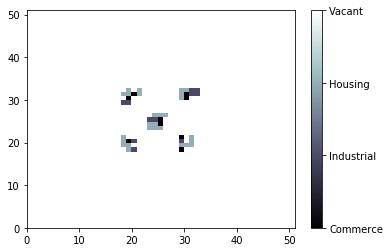

In [682]:
#berlin style city (multi-celled)
berlin = []
for i in range(0,size):
    berlin.append([])
    for j in range(0,size):
        berlin[i].append([3])
        berlin[i][j].append([0,0,0])

#What the city looks like
berlin[18][19][0] = 2
berlin[18][20][0] = 1
berlin[18][29][0] = 0
berlin[19][18][0] = 2
berlin[19][19][0] = 2
berlin[19][29][0] = 2
berlin[19][30][0] = 2
berlin[19][31][0] = 2
berlin[20][18][0] = 2
berlin[20][19][0] = 0
berlin[20][20][0] = 1
berlin[20][29][0] = 1
berlin[20][31][0] = 2
berlin[21][18][0] = 2
berlin[21][29][0] = 0
berlin[21][31][0] = 2
berlin[23][23][0] = 2
berlin[23][24][0] = 2
berlin[23][25][0] = 2
berlin[24][23][0] = 2
berlin[24][24][0] = 2
berlin[24][25][0] = 0
berlin[25][23][0] = 1
berlin[25][24][0] = 1
berlin[25][25][0] = 0
berlin[26][24][0] = 2
berlin[26][25][0] = 2
berlin[26][26][0] = 2
berlin[29][18][0] = 1
berlin[29][19][0] = 1
berlin[30][19][0] = 0
berlin[30][29][0] = 2
berlin[30][30][0] = 0
berlin[31][18][0] = 2
berlin[31][19][0] = 2
berlin[31][20][0] = 0
berlin[31][21][0] = 2
berlin[31][29][0] = 2
berlin[31][30][0] = 0
berlin[31][31][0] = 1
berlin[31][32][0] = 1
berlin[32][19][0] = 2
berlin[32][21][0] = 2
berlin[32][29][0] = 2
berlin[32][30][0] = 2
berlin[32][31][0] = 1
berlin[32][32][0] = 1

visualize_grid(berlin)


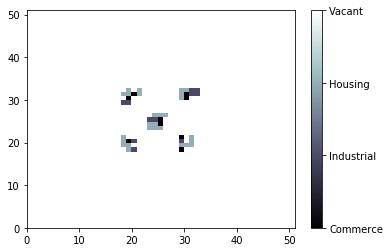

1
[1.06, 4.24, 7.42]


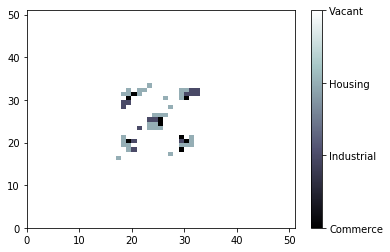

2
[1.1236000000000002, 4.494400000000001, 7.865200000000001]


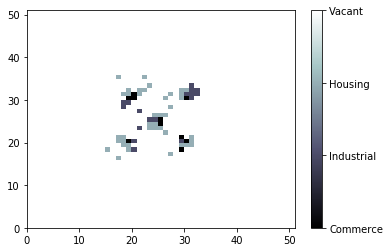

3
[1.1910160000000003, 4.764064000000001, 8.337112000000001]


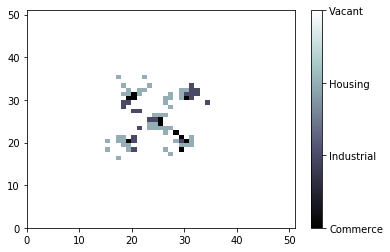

4
[1.2624769600000003, 5.049907840000001, 8.837338720000002]


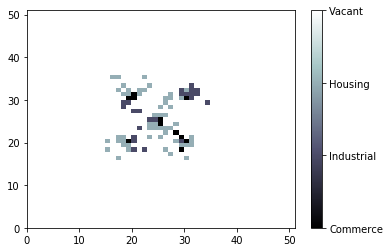

5
[1.3382255776000005, 5.352902310400002, 9.367579043200003]


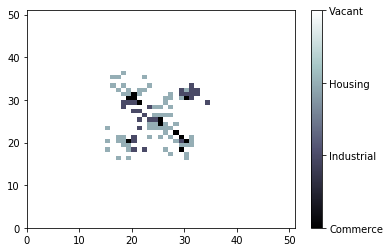

6
[1.4185191122560006, 5.674076449024002, 9.929633785792003]


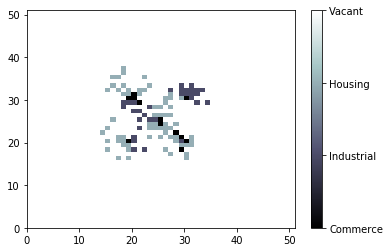

7
[1.5036302589913606, 6.014521035965442, 10.525411812939524]


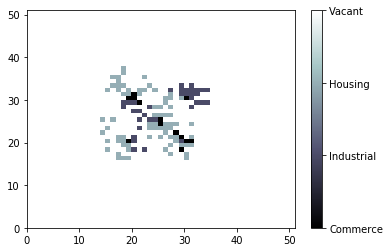

8
[1.5938480745308423, 6.375392298123369, 11.156936521715895]


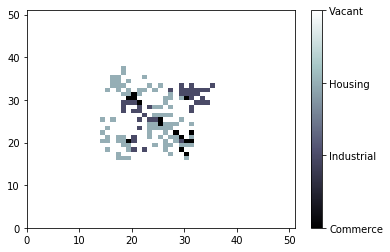

9
[1.6894789590026928, 6.757915836010771, 11.82635271301885]


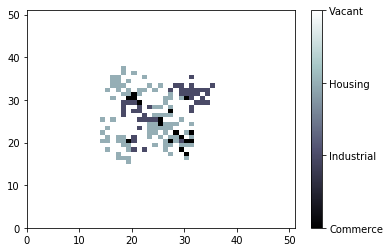

10
[1.7908476965428546, 7.163390786171418, 12.53593387579998]


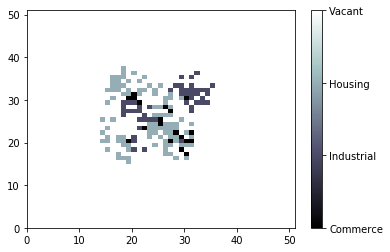

11
[1.898298558335426, 7.593194233341704, 13.28808990834798]


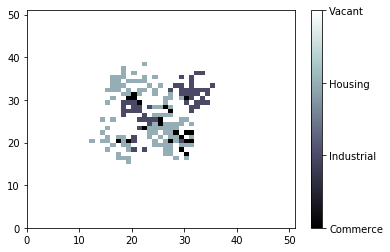

12
[2.0121964718355514, 8.048785887342206, 14.085375302848858]


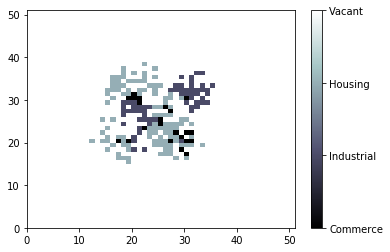

13
[2.1329282601456847, 8.531713040582739, 14.93049782101979]


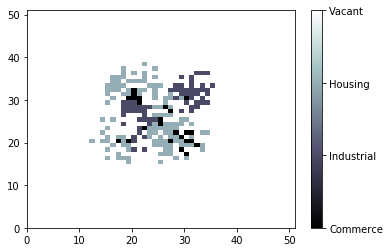

14
[2.2609039557544257, 9.043615823017703, 15.826327690280978]


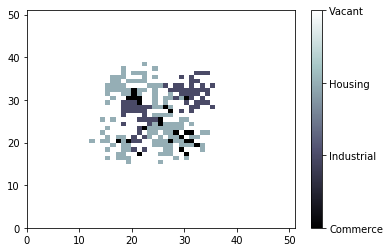

15
[2.3965581930996915, 9.586232772398766, 16.77590735169784]


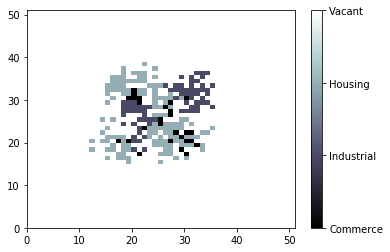

16
[2.5403516846856733, 10.161406738742693, 17.78246179279971]


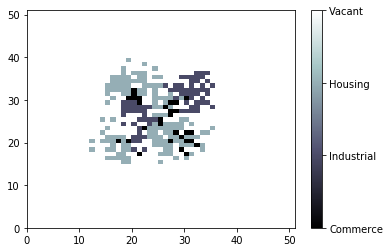

17
[2.692772785766814, 10.771091143067256, 18.849409500367695]


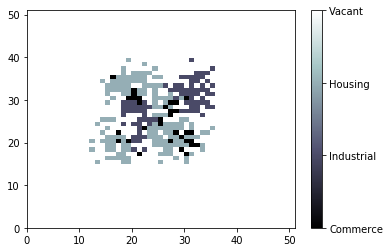

18
[2.854339152912823, 11.417356611651291, 19.980374070389757]


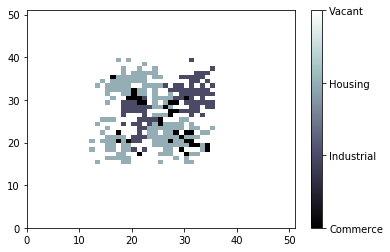

19
[3.0255995020875925, 12.10239800835037, 21.179196514613142]


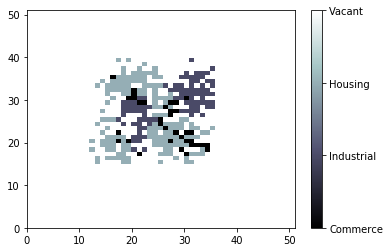

20
[3.2071354722128484, 12.828541888851394, 22.449948305489933]


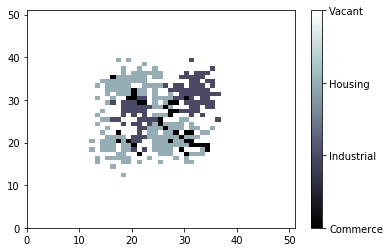

21
[3.3995636005456196, 13.598254402182478, 23.79694520381933]


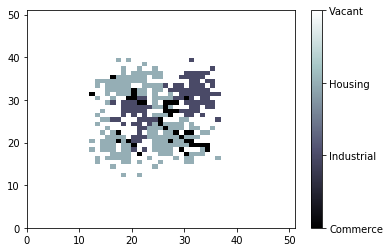

22
[3.603537416578357, 14.414149666313428, 25.224761916048493]


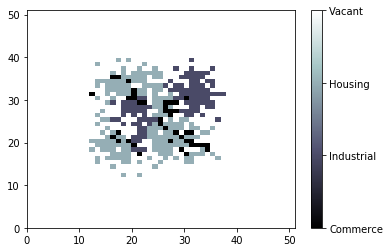

23
[3.8197496615730584, 15.278998646292234, 26.738247631011404]


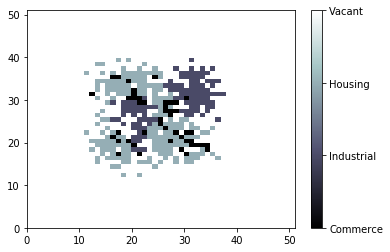

24
[4.048934641267442, 16.195738565069767, 28.34254248887209]


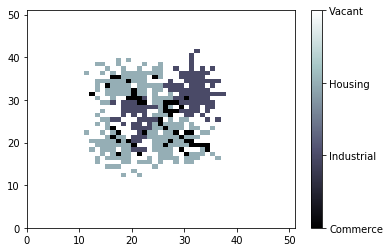

25
[4.291870719743488, 17.167482878973953, 30.043095038204417]


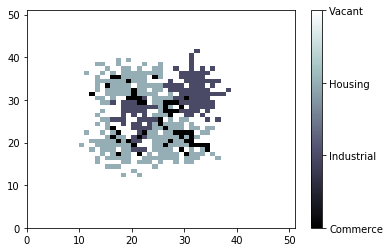

26
[4.549382962928098, 18.19753185171239, 31.845680740496682]


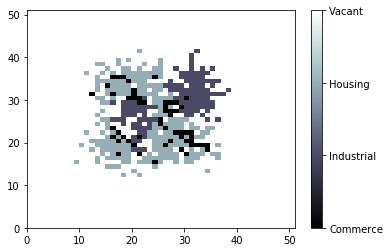

27
[4.822345940703784, 19.289383762815135, 33.756421584926485]


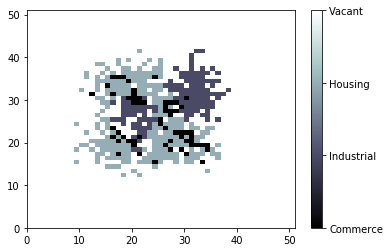

28
[5.111686697146011, 20.446746788584043, 35.781806880022074]


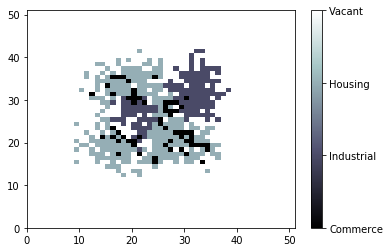

29
[5.418387898974772, 21.673551595899088, 37.9287152928234]


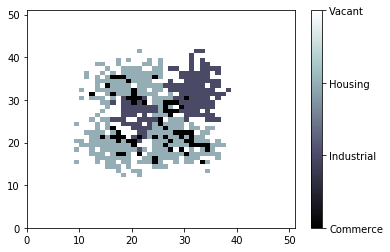

30
[5.7434911729132585, 22.973964691653034, 40.2044382103928]


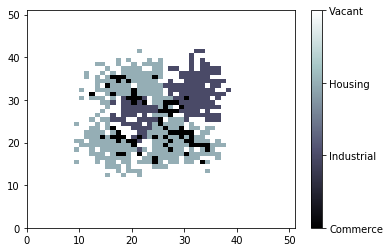

31
[6.088100643288055, 24.35240257315222, 42.61670450301637]


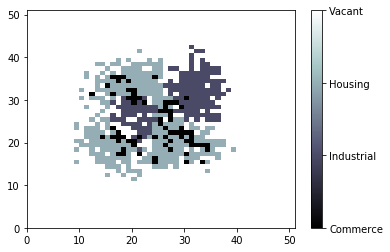

32
[6.4533866818853385, 25.813546727541354, 45.17370677319736]


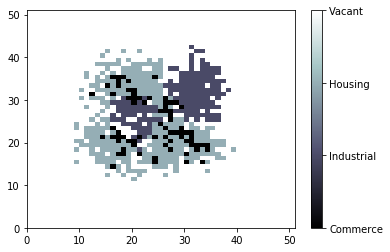

33
[6.840589882798459, 27.362359531193835, 47.8841291795892]


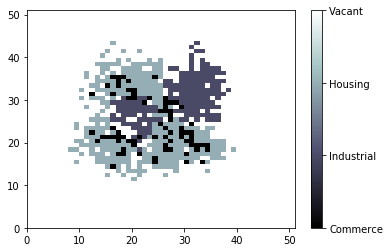

34
[7.2510252757663665, 29.004101103065466, 50.75717693036456]


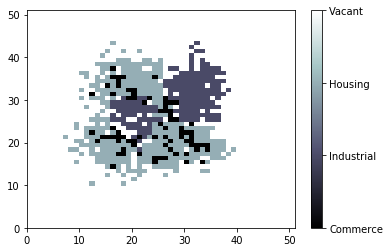

35
[7.686086792312349, 30.744347169249394, 53.80260754618644]


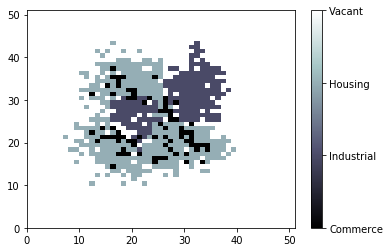

36
[8.14725199985109, 32.58900799940436, 57.030763998957624]


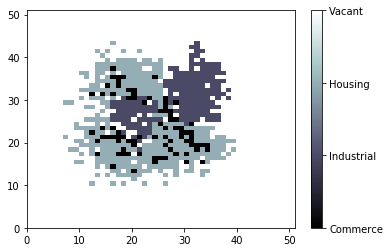

37
[8.636087119842156, 34.54434847936862, 60.452609838895086]


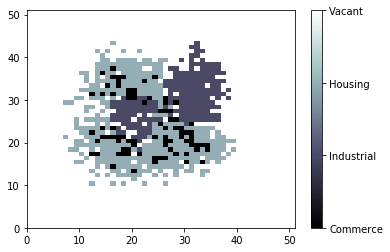

38
[9.154252347032685, 36.61700938813074, 64.0797664292288]


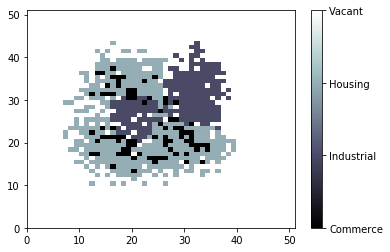

39
[9.703507487854646, 38.81402995141858, 67.92455241498253]


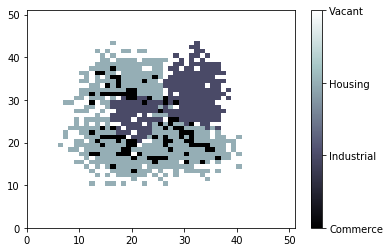

40
[10.285717937125925, 41.1428717485037, 72.00002555988148]


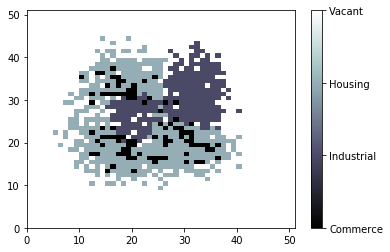

In [683]:
#simulation for berlin
growth_ratio = [1.0,4.0,7.0]
growth_rate = .06
berlin_analytics = run_sim_with_analytics(40,growth_rate, growth_ratio, berlin)
visualize_grid(berlin)

In [376]:
testgrid = []
for i in range(0,size):
    testgrid.append([])
    for j in range(0,size):
        testgrid[i].append([3])
        testgrid[i][j].append([0,0,0])
testgrid[25][25][0] = 2
testgrid[26][25][0] = 1
testgrid[26][24][0] = 1
testgrid[25][24][0] = 0
testgrid[25][26][0] = 2
testgrid[24][24][0] = 0

growth_ratio = [1.0,4.0,7.0]
growth_rate = .05



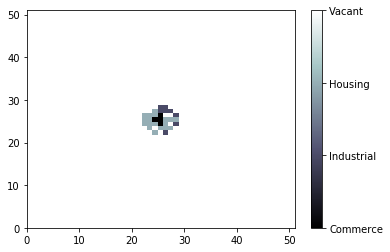

In [686]:
#walled city
walled = []
for i in range(0,size):
    walled.append([])
    for j in range(0,size):
        walled[i].append([3])
        walled[i][j].append([0,0,0])

walled[22][24][0] = 2
walled[22][26][0] = 1
walled[23][23][0] = 2
walled[23][25][0] = 2
walled[23][26][0] = 2
walled[23][27][0] = 2
walled[24][22][0] = 2
walled[24][23][0] = 2
walled[24][24][0] = 2
walled[24][25][0] = 0
walled[24][26][0] = 2
walled[24][28][0] = 1
walled[25][22][0] = 2
walled[25][23][0] = 2
walled[25][24][0] = 0
walled[25][25][0] = 0
walled[25][26][0] = 2
walled[25][27][0] = 2
walled[25][28][0] = 2
walled[26][22][0] = 2
walled[26][23][0] = 2
walled[26][24][0] = 2
walled[26][25][0] = 0
walled[26][28][0] = 1
walled[27][24][0] = 2
walled[27][25][0] = 1
walled[27][26][0] = 1
walled[27][27][0] = 1
walled[28][25][0] = 1
walled[28][26][0] = 1

visualize_grid(walled)


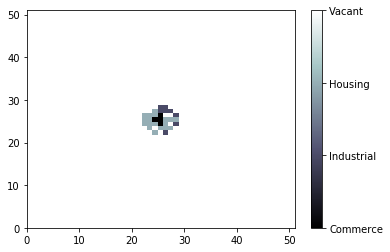

1
[1.06, 4.24, 7.42]


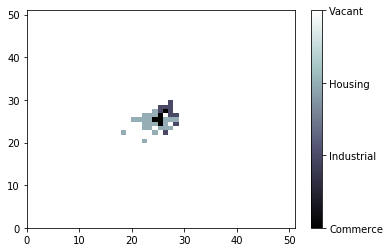

2
[1.1236000000000002, 4.494400000000001, 7.865200000000001]


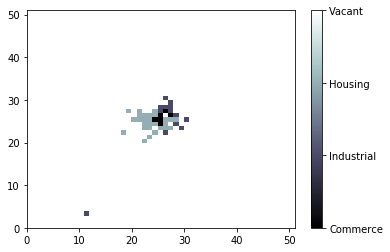

3
[1.1910160000000003, 4.764064000000001, 8.337112000000001]


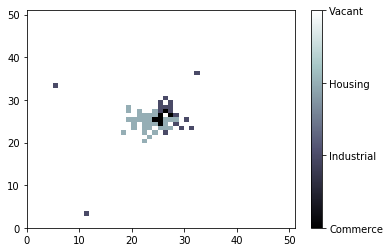

4
[1.2624769600000003, 5.049907840000001, 8.837338720000002]


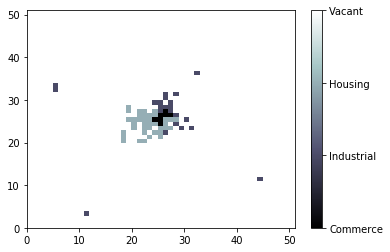

5
[1.3382255776000005, 5.352902310400002, 9.367579043200003]


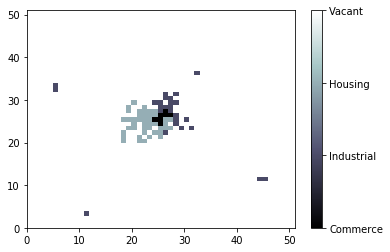

6
[1.4185191122560006, 5.674076449024002, 9.929633785792003]


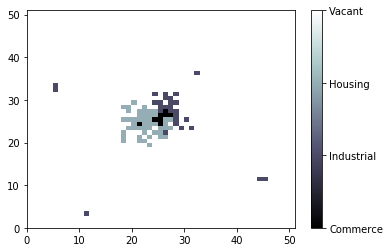

7
[1.5036302589913606, 6.014521035965442, 10.525411812939524]


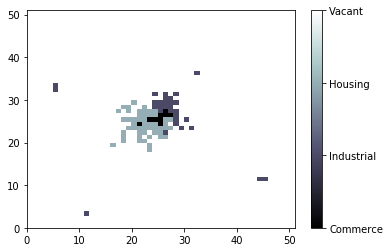

8
[1.5938480745308423, 6.375392298123369, 11.156936521715895]


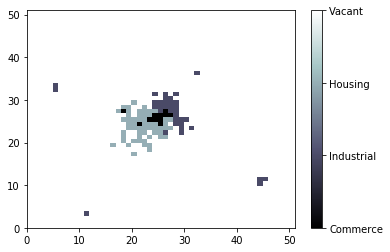

9
[1.6894789590026928, 6.757915836010771, 11.82635271301885]


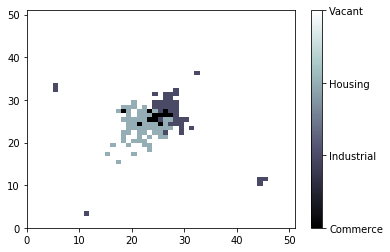

10
[1.7908476965428546, 7.163390786171418, 12.53593387579998]


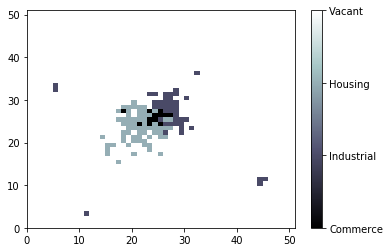

11
[1.898298558335426, 7.593194233341704, 13.28808990834798]


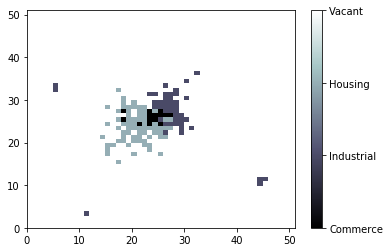

12
[2.0121964718355514, 8.048785887342206, 14.085375302848858]


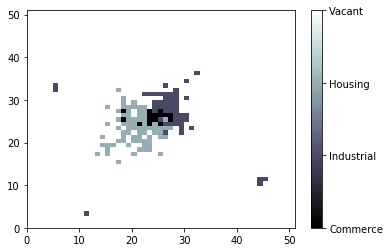

13
[2.1329282601456847, 8.531713040582739, 14.93049782101979]


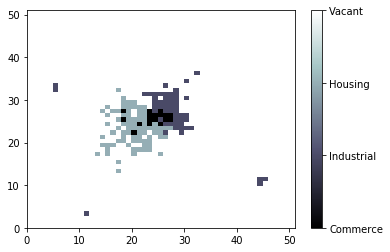

14
[2.2609039557544257, 9.043615823017703, 15.826327690280978]


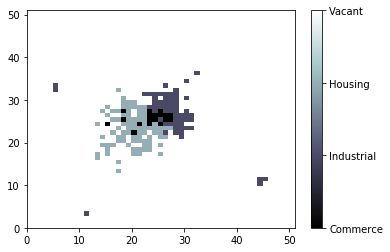

15
[2.3965581930996915, 9.586232772398766, 16.77590735169784]


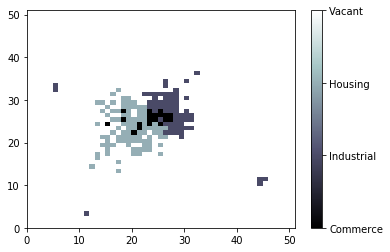

16
[2.5403516846856733, 10.161406738742693, 17.78246179279971]


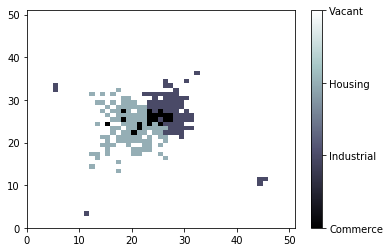

17
[2.692772785766814, 10.771091143067256, 18.849409500367695]


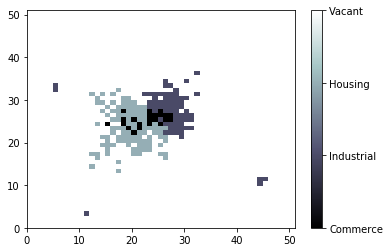

18
[2.854339152912823, 11.417356611651291, 19.980374070389757]


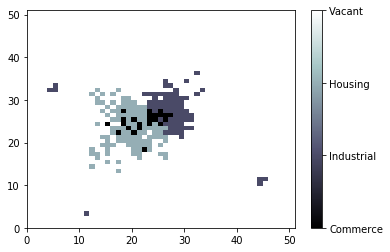

19
[3.0255995020875925, 12.10239800835037, 21.179196514613142]


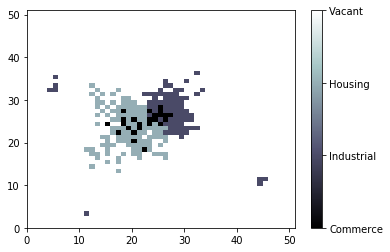

20
[3.2071354722128484, 12.828541888851394, 22.449948305489933]


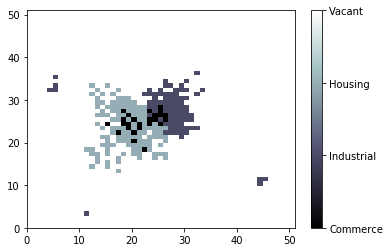

21
[3.3995636005456196, 13.598254402182478, 23.79694520381933]


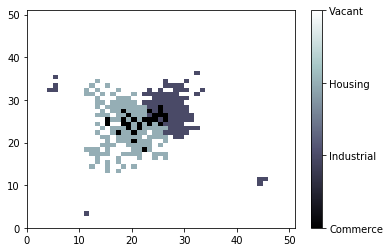

22
[3.603537416578357, 14.414149666313428, 25.224761916048493]


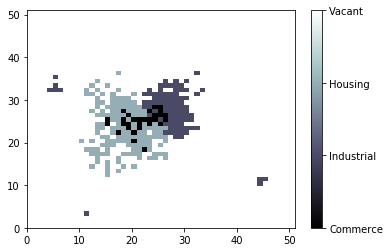

23
[3.8197496615730584, 15.278998646292234, 26.738247631011404]


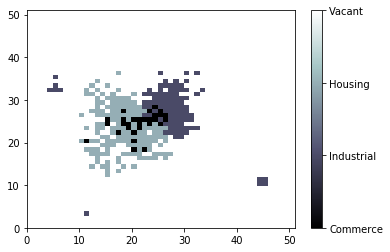

24
[4.048934641267442, 16.195738565069767, 28.34254248887209]


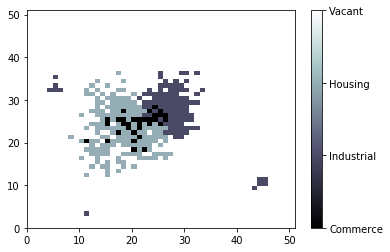

25
[4.291870719743488, 17.167482878973953, 30.043095038204417]


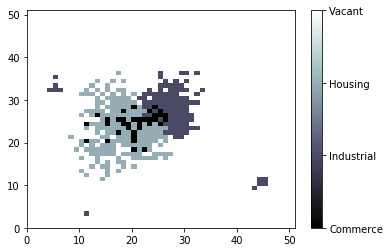

26
[4.549382962928098, 18.19753185171239, 31.845680740496682]


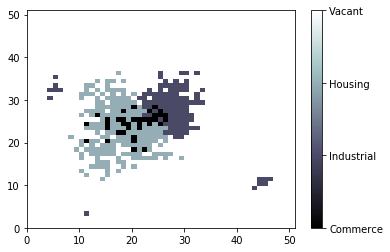

27
[4.822345940703784, 19.289383762815135, 33.756421584926485]


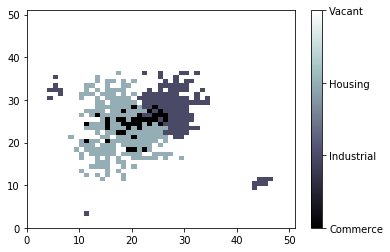

28
[5.111686697146011, 20.446746788584043, 35.781806880022074]


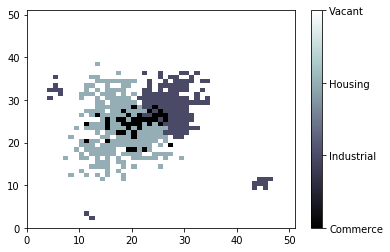

29
[5.418387898974772, 21.673551595899088, 37.9287152928234]


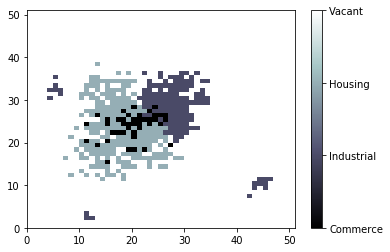

30
[5.7434911729132585, 22.973964691653034, 40.2044382103928]


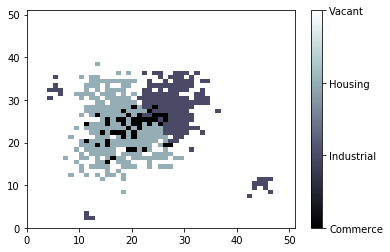

31
[6.088100643288055, 24.35240257315222, 42.61670450301637]


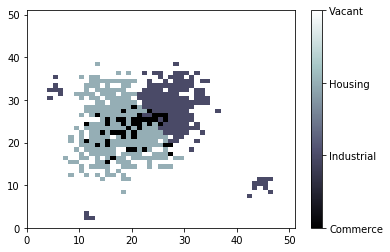

32
[6.4533866818853385, 25.813546727541354, 45.17370677319736]


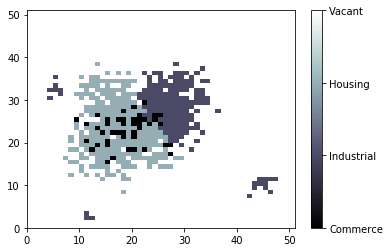

33
[6.840589882798459, 27.362359531193835, 47.8841291795892]


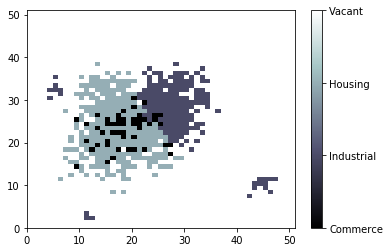

34
[7.2510252757663665, 29.004101103065466, 50.75717693036456]


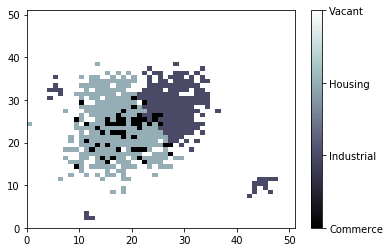

35
[7.686086792312349, 30.744347169249394, 53.80260754618644]


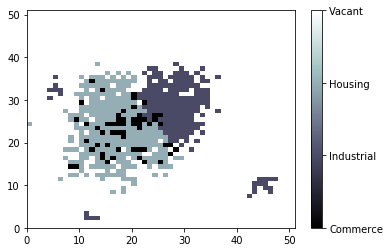

36
[8.14725199985109, 32.58900799940436, 57.030763998957624]


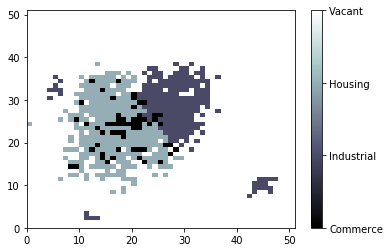

37
[8.636087119842156, 34.54434847936862, 60.452609838895086]


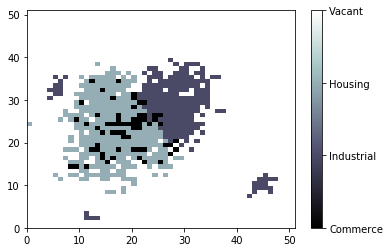

38
[9.154252347032685, 36.61700938813074, 64.0797664292288]


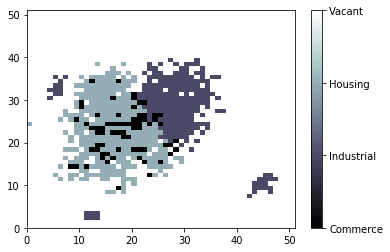

39
[9.703507487854646, 38.81402995141858, 67.92455241498253]


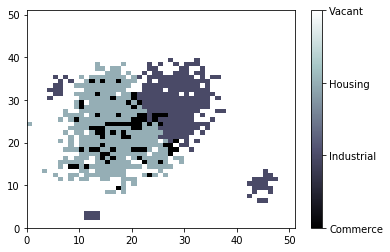

40
[10.285717937125925, 41.1428717485037, 72.00002555988148]


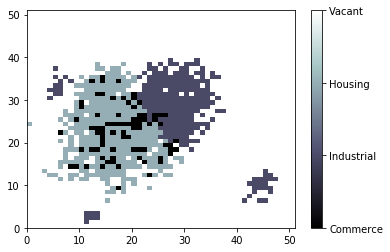

In [687]:
#simulation for walled city
growth_ratio = [1.0,4.0,7.0]
growth_rate = .06
walled_analytics = run_sim_with_analytics(40,growth_rate, growth_ratio, walled)
visualize_grid(walled)

In [469]:
#clustering coefficient
def get_cluster_coefficient_for_cell(x,y,cell_type,grid = []):
    num_same_neighbors = 0
    num_eligible_neighbors = 0
    
    for j in range(0,13):
        for i in range (0,13):
            dist = get_dist(i-6,j-6)
            #since i and j are relative to the position of the cell, 
            #i and j's actual positions are given by the following:
            real_i = int(x+i-6)
            real_j = int(y+j-6)
            #Check if neighboring cells are in range of the grid
            if(real_i>=0 and real_i <size and real_j>=0 and real_j<size):
                #check if cells are in the neihborhood zone
                if(dist <= 6):
                    num_eligible_neighbors += 1
                    #check if cells are not vacant type:
                    neighbor_type = get_type(real_i,real_j,grid)
                    if(neighbor_type == cell_type):
                        num_same_neighbors += 1
    return num_same_neighbors/(num_eligible_neighbors)

def get_cluster_coefficient_for_grid(grid = []):
    clustercount = [0.0,0.0,0.0]
    typecount = [0,0,0]
    for i in range(0,size):
        for j in range (0,size):
            celltype = grid[i][j][0]
            #no cluster coefficient for vacant cells
            if (celltype < 3):
                clustercount[celltype] += get_cluster_coefficient_for_cell(i,j,celltype,grid)
                typecount[celltype] += 1
    #average cluster coefficient
    clustercoeff = [0.0,0.0,0.0]
    for i in range(0,3):
        clustercoeff[i] = clustercount[i]/typecount[i]
    return np.array(clustercoeff)
                
                
                

In [453]:
#potential standard deviation as a function of time
def get_potentials_for_grid (grid = []):
    potentials = []
    for i in range(0,size):
        for j in range(0,size):
            potentials.append(grid[i][j][1])
    return potentials

def get_stddevs_for_grid(grid = []):
    potentials = get_potentials_for_grid(grid)
    return np.std(potentials, axis = 0)


In [648]:
#graphing analytics

def graph_analytics(analytics = []):
    analytics_array = np.array(analytics).transpose()
    cluster_coefficient = analytics_array[:,0].transpose()
    stddev = analytics_array[:,1].transpose()
    t = np.arange(0,len(stddev),1)
    fig = plt.figure(figsize = (10, 16))
    plt.subplot(211)
    plt.plot(t, cluster_coefficient, 'o-')
    plt.title('Cluster coefficients for cell states')
    plt.xlabel('time')
    plt.ylabel('Cluster Coefficient')
    plt.legend(['Commerce','Industry','Housing'])
    plt.subplot(212)
    plt.plot(t, stddev, 'o-')
    plt.title('standard deviation of transition potentials to each state')
    plt.xlabel('time')
    plt.ylabel('Cluster Coefficient')
    plt.legend(['Commerce','Industry','Housing'])
    #fig.savefig('berlinanalytics3.png')
    plt.show()

    

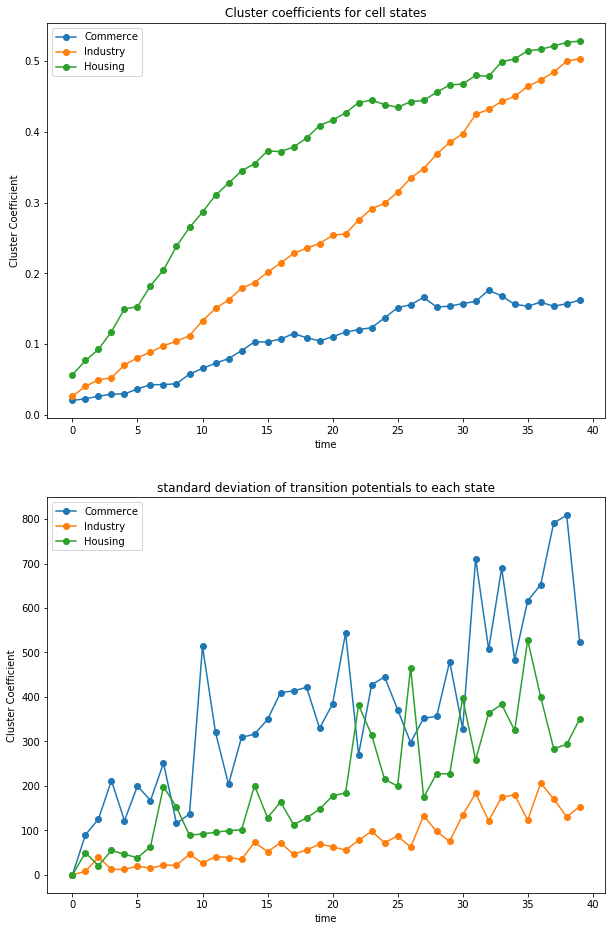

In [649]:
walled_analytics_array = np.array(walled_analytics).transpose()
cluster_coeff_walled = walled_analytics_array[:,0].transpose()
stddev_walled = walled_analytics_array[:,1].transpose()

graph_analytics(berlin_analytics)


In [608]:
print(a)

2.5
